In [1]:
from constants import *
import os
import pandas as pd
from training_model_inception import trainInception
from stroke import *
from training_model_knnsktime import trainKNN
from training_model_shapeletClass import trainShapelet
from training_model_cnn import trainCNN

In [2]:
pathToCVSData = '/Users/nathansadoun/Desktop/INSA/ML/Video_classification/MediaEval_ClassificationTask/dataSetCSV'

listStrokesTrain = []
listStrokesValidation = []

for folder in sorted(os.listdir(pathToCVSData)):
    pathToFolder = os.path.join(pathToCVSData, folder)
    if folder == "train":
        for subfolder in sorted(os.listdir(pathToFolder)):
            if subfolder in SELECTED_TRICKS:
                pathToSubFolder = os.path.join(pathToFolder, subfolder)
                for file in sorted(os.listdir(pathToSubFolder)):
                        strokeData = pd.read_csv(os.path.join(pathToSubFolder, file), delimiter=';', decimal='.')
                        stroke = Stroke(data=strokeData, label=subfolder, id=file)
                        listStrokesTrain.append(stroke)

    if folder == "validation":
        for subfolder in sorted(os.listdir(pathToFolder)):
            if subfolder in SELECTED_TRICKS:
                pathToSubFolder = os.path.join(pathToFolder, subfolder)
                for file in sorted(os.listdir(pathToSubFolder)):
                        strokeData = pd.read_csv(os.path.join(pathToSubFolder, file), delimiter=';', decimal='.')
                        stroke = Stroke(data=strokeData, label=subfolder, id=file)
                        listStrokesValidation.append(stroke)

for stroke in listStrokesTrain:
    #stroke.smootheningData()
    stroke.normalize()

for stroke in listStrokesValidation:
    #stroke.smootheningData()
    stroke.normalize()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 24, 200)]            0         []                            
                                                                                                  
 conv1d (Conv1D)             (None, 24, 32)               6400      ['input_1[0][0]']             
                                                                                                  
 max_pooling1d (MaxPooling1  (None, 24, 200)              0         ['input_1[0][0]']             
 D)                                                                                               
                                                                                                  
 conv1d_1 (Conv1D)           (None, 24, 32)               40960     ['conv1d[0][0]']          

INFO:tensorflow:Assets written to: modelsinception_03_10_2023_90%/keras/assets


58/58 [==============================] - 0s 2ms/step
Time to predict:  0.4044308662414551
[19 19 19 19 19 19 18 18  9 18 18 17 17 16 16 16 16 16 16 15 16  9 16 14
 18 14 14 15 14 14 20 20 20 20 20 20 16 20  4 20 20 20 20 15 14 20 20 20
 20 20 20 13 13 13 15 13 13 10  6 11 11 11 11 11  8 11 12 12 13 18 12 12
 10 10 10 10 10 10 10 10 10  8  8  8  8  9 14  8  8  8  8  8  8  9  9  9
  9 15  9  9  9  4  4  4  4  7  4  7  6  4  4  4  6  4  4 19  4  5  5  5
  5  5  5  5  5  5  5  7  5  6  6  5  6  6  7  6  6  6  4  6  6  6  6  6
  6  6  7  7  7  7  7  7  7 20  5  4  7  4  7  7  7  7  2  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  1 13  1  1  1 20  1  1  1  1  1  2  1
  1  2  1  0  0  2  2  2  2  1  2  2  6  1  2  3  2  2  2  3  3  3  3  1
  3  3  3  3  3  3  3  3  3  3  3  3  3  3]
[19 19 19 19 19 19 18 18 18 18 18 17 17 16 16 16 16 16 16 16 16 15 15 14
 14 14 14 14 14 14 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20
 20 20 20 13 13 13 13 13 13 13 11 11 11 11 11 11 11 11 12 12 12

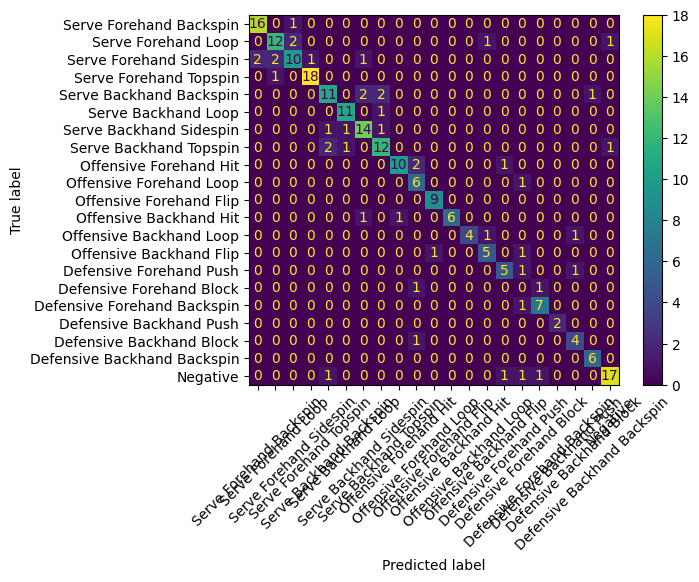

In [3]:
trainInception(listStrokesTrain, listStrokesValidation)

Epoch 1/200
669/669 [==============================] - 4s 6ms/step - loss: 3.0249 - accuracy: 0.0822 - val_loss: 2.9362 - val_accuracy: 0.0794
Epoch 2/200
669/669 [==============================] - 4s 6ms/step - loss: 2.9190 - accuracy: 0.0762 - val_loss: 2.8384 - val_accuracy: 0.0952
Epoch 3/200
669/669 [==============================] - 4s 6ms/step - loss: 2.8934 - accuracy: 0.0688 - val_loss: 2.8241 - val_accuracy: 0.0794
Epoch 4/200
669/669 [==============================] - 4s 6ms/step - loss: 2.8842 - accuracy: 0.0777 - val_loss: 2.8075 - val_accuracy: 0.0952
Epoch 5/200
669/669 [==============================] - 4s 6ms/step - loss: 2.8754 - accuracy: 0.0912 - val_loss: 2.8004 - val_accuracy: 0.0952
Epoch 6/200
669/669 [==============================] - 4s 6ms/step - loss: 2.8689 - accuracy: 0.0822 - val_loss: 2.7863 - val_accuracy: 0.0794
Epoch 7/200
669/669 [==============================] - 4s 6ms/step - loss: 2.8591 - accuracy: 0.1061 - val_loss: 2.7666 - val_accuracy: 0.0952

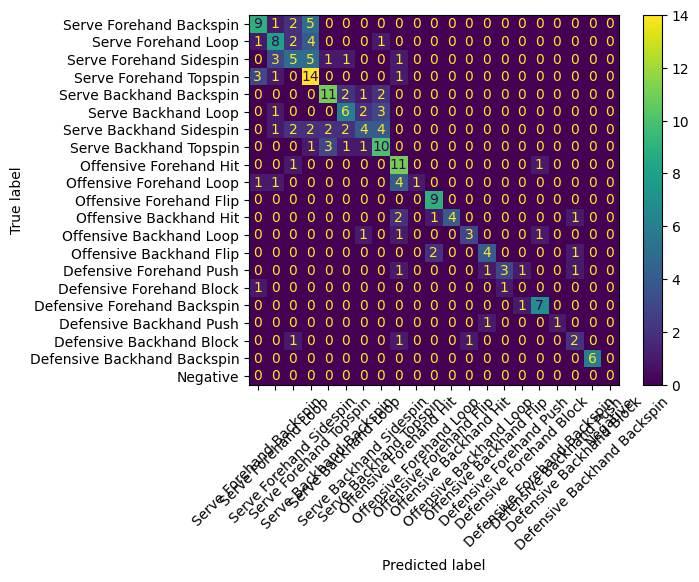

In [5]:
trainCNN(listStrokesTrain, listStrokesValidation)

In [6]:
trainKNN(listStrokesTrain, listStrokesValidation)

KeyboardInterrupt: 

Time to fit:  259.068323135376
Time to predict:  2.502518892288208
[19 19 19 19 11 19 18 18  7 20 11 13 17 16 16 16 16 16 16 15 16 16 14 14
 10 14 14 15 14 14 20 20 20 20 16 20 14 20 20 20 20 20 20 20 10 20 20 11
 20 20  8 13 13 13 11 13 13 13  8 11 11 11  7 11  6  6 12 12  6 14 12 12
 10 10 10 10 10 10 10 10 10  8  8  8  8 18 14  8  8  8  8  8  8 20  9  9
 16 20  9  9 10  4  4  4  4  4  4  7  4  4  4  7  4  4  4  7  4  5  5  5
  5  5  5  4  5  5  5  5  5  6  6 20  6  6  6  5  6  5 20  6  6  6  6  6
  6  6  7  7  7  7  7  7  6 20  7  7  7  4  7  7  7  7  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1 20  1  1  1  1  1  2  1
  1  1  1  1 16  2  2  2  2  1  3  2  6  1  2  3  2  2  2  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3]
[19 19 19 19 19 19 18 18 18 18 18 17 17 16 16 16 16 16 16 16 16 15 15 14
 14 14 14 14 14 14 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20
 20 20 20 13 13 13 13 13 13 13 11 11 11 11 11 11 11 11 12 12 12 12 12 12
 10 10 10 10 

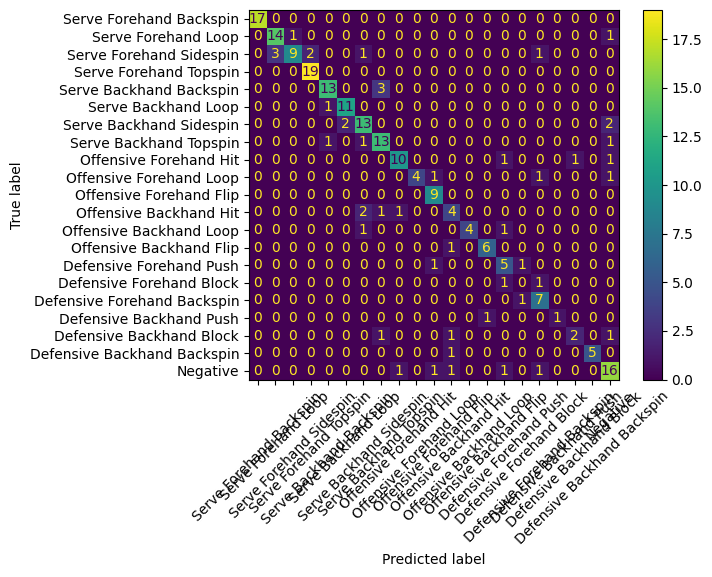

In [4]:
trainShapelet(listStrokesTrain, listStrokesValidation)